# <p><center> Pneumonia Overview </center> </p>

![d](https://www.mayoclinic.org/-/media/kcms/gbs/patient-consumer/images/2016/05/18/13/02/ww5r032t-8col-jpg.jpg)

Pneumonia is a common infection that inflames the alveoli (air sacs) in the lungs. The alveoli can fill with purulent material (fluid or pus) which results in coughing, breathing difficulties, chills and fevers.
Bacteria, fungi and virus infections can cause pneumonia. Depending on the age and existing health conditions of a patient determines the severity of pneumonia. For example, young children and elderly and susceptible to pneumonia as well as those who have any underlying health conditions, especially conditions that affect the respiratory system. Mild signs and symptoms often are similar to those of a cold or flu, but they last longer.

#### Signs and symptoms of pneumonia may include:

* Chest pain when you breathe or cough
* Confusion or changes in mental awareness (in adults age 65 and older)
* Cough, which may produce phlegm
* Fatigue
* Fever, sweating and shaking chills
* Lower than normal body temperature (in adults older than age 65 and people with weak immune systems)
* Nausea, vomiting or diarrhea
* Shortness of breath

Therefore, in this project, we wish to help discover this disease as soon as possible and assist doctor's to diagnose patients more accurately so that patients may receive appropriate treatment as soon as possible.
   

# Importing Libraries

In [1]:
import os
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

# load The image

In [2]:
train_dir = "../input/chest-xray-pneumonia/chest_xray/train"
test_dir = "../input/chest-xray-pneumonia/chest_xray/test"
val_dir = "../input/chest-xray-pneumonia/chest_xray/val"

### Show the size of image

In [66]:
num_pneumonia = len(os.listdir(os.path.join(train_dir, 'PNEUMONIA')))
num_normal = len(os.listdir(os.path.join(train_dir, 'NORMAL')))

In [67]:
print(f"PNEUMONIA={num_pneumonia}")
print(f"NORMAL={num_normal}")

PNEUMONIA=3875
NORMAL=1341


In [68]:
print(f"PNEUMONIA={len(os.listdir(os.path.join(test_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(test_dir, 'NORMAL')))}")

PNEUMONIA=390
NORMAL=234


In [69]:
print(f"PNEUMONIA={len(os.listdir(os.path.join(val_dir, 'PNEUMONIA')))}")
print(f"NORMAL={len(os.listdir(os.path.join(val_dir, 'NORMAL')))}")

PNEUMONIA=8
NORMAL=8


In [70]:
pneumonia = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA")
pneumonia_dir = "../input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA"

In [71]:
# Train Normal 
NORMAL = os.listdir("../input/chest-xray-pneumonia/chest_xray/train/NORMAL")
NORMAL_dir = "../input/chest-xray-pneumonia/chest_xray/train/NORMAL"

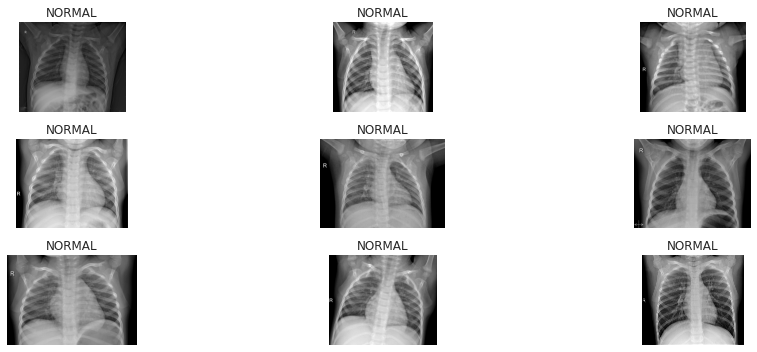

In [72]:
# Show normal images
plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(NORMAL_dir, NORMAL[i]))
    plt.title("NORMAL")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

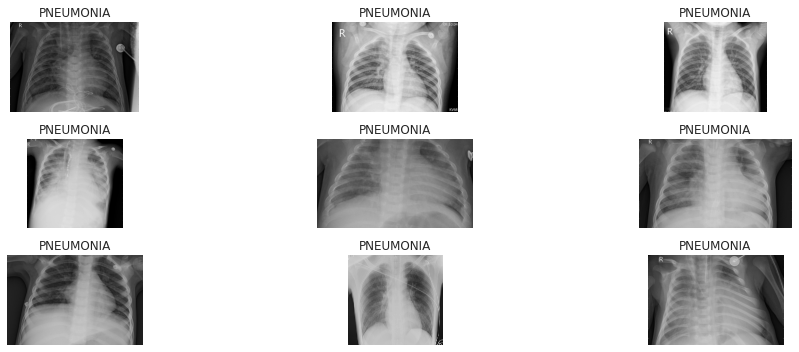

In [73]:
# Show pneumonia images
plt.figure(figsize=(15, 5))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.title("PNEUMONIA")
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    

plt.tight_layout()

## Creat a Label for the data

In [10]:
import glob

pneumonia_train = glob.glob(train_dir+"/PNEUMONIA/*.jpeg")
normal_train = glob.glob(train_dir+"/NORMAL/*.jpeg")

In [11]:
# Here we creat label 0 for (Normal) 1 for( pneumonia )
data = pd.DataFrame(np.concatenate([[0]*len(normal_train) ,
                                    [1]*len(pneumonia_train)]),columns=["class"])

In [12]:
data.head()

class
0      0
1      0
2      0
3      0
4      0

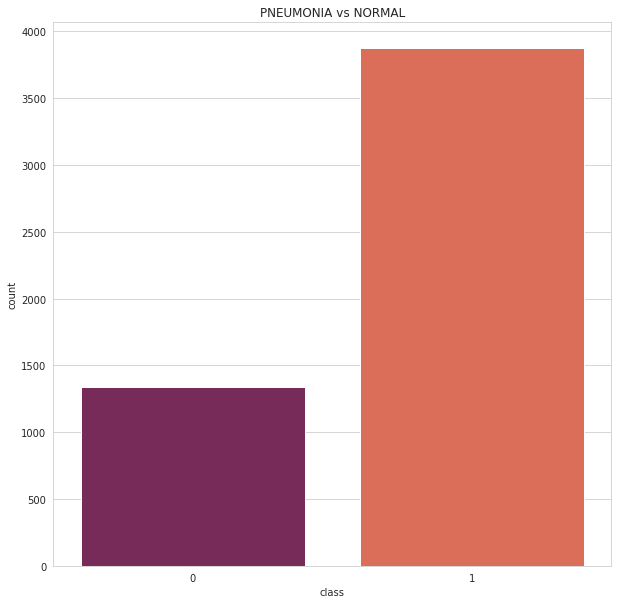

In [16]:
plt.figure(figsize=(10,10))
sns.countplot(data['class'],data=data,palette='rocket',color='red')
plt.title('PNEUMONIA vs NORMAL')
plt.show()

# Here we can Augmented Data

In [20]:
img_Datagen = ImageDataGenerator(
        rescale = 1/255,
        shear_range=10,
        zoom_range=0.3,
        horizontal_flip=True,
        vertical_flip=True,
        brightness_range=[0.5,2.0],
        width_shift_range = 0.2,
        rotation_range=20,
        fill_mode = 'nearest'
)
val_Datagen = ImageDataGenerator(
        rescale = 1/255
)

## For Train data

In [24]:
train = img_Datagen.flow_from_directory(train_dir,
                                       batch_size=64,
                                       class_mode='binary',
#                                        target_size=(224,224,3))
                                       )

Found 5216 images belonging to 2 classes.


## For validation data

In [25]:
validation = val_Datagen.flow_from_directory(val_dir,
                                              batch_size=64,
                                              class_mode='binary',
#                                               target_size=(224,224,3))
                                            )

Found 16 images belonging to 2 classes.


## For test data

In [26]:
test = val_Datagen.flow_from_directory(test_dir,
                                       batch_size=64,
                                       class_mode='binary')

Found 624 images belonging to 2 classes.


In [27]:
img, label = next(train)

In [31]:
print("The shape of img:",img.shape)
print("The shape of label:",label.shape)

The shape of img: (64, 256, 256, 3)
The shape of label: (64,)


# Using First Model VGG16

In [32]:
vgg_model = tf.keras.applications.VGG19(
    weights='imagenet',
    include_top = False,
#     input_shape = (224,224,3)
)

for layer in vgg_model.layers:
    layer.trainable=False
    
x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)



2022-04-16 08:48:09.303553: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-16 08:48:09.379675: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-16 08:48:09.380415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-04-16 08:48:09.381747: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

80150528/80134624 [==============================] - 1s 0us/step


In [33]:
# To avoid overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

In [34]:
# Compiling the model
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [37]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

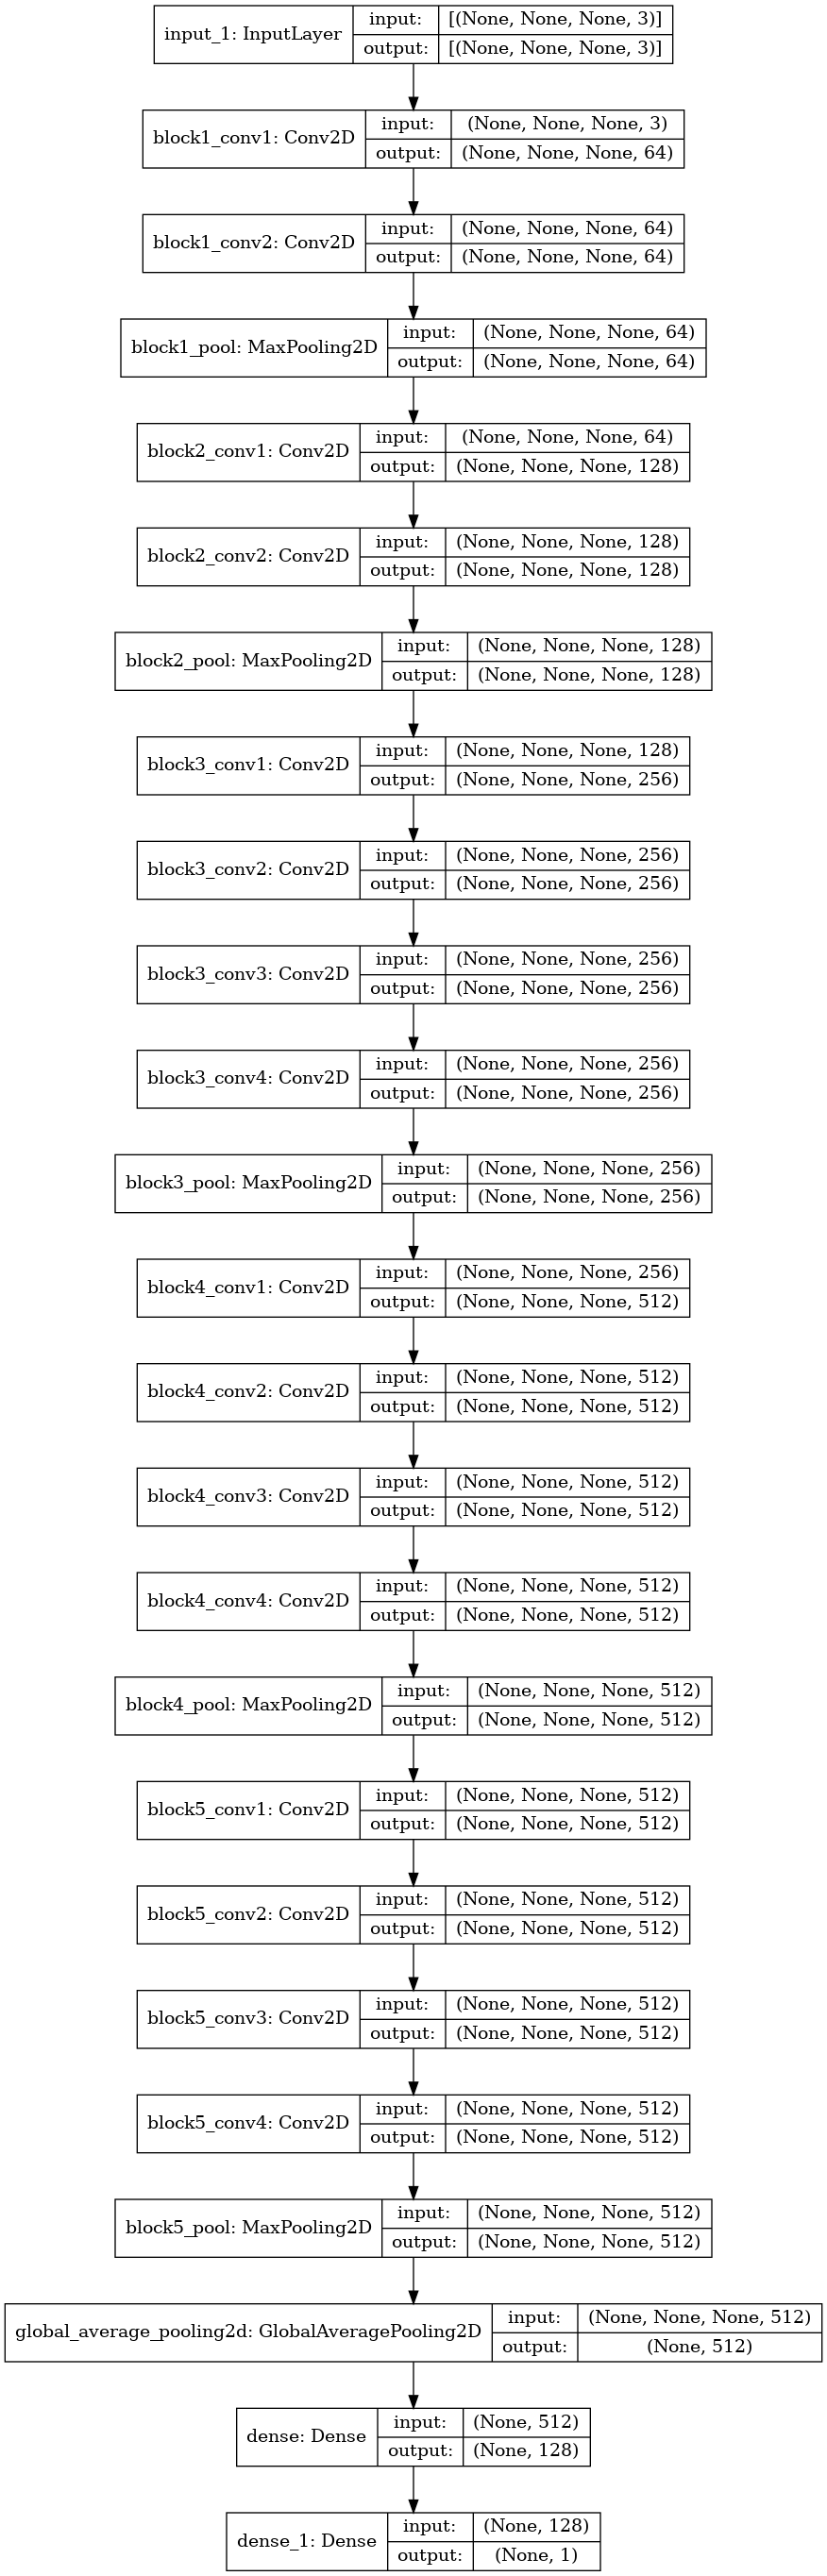

In [38]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model, to_file='cnn-mnist.png', show_shapes=True)

In [39]:
history = model.fit(train,epochs=30, 
                    validation_data=validation,
                     steps_per_epoch=50,
                    callbacks=[early_stopping,lr],
                    batch_size=64)

2022-04-16 08:50:07.209756: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/30


2022-04-16 08:50:11.293811: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


50/50 [==============================] - 111s 2s/step - loss: 0.5409 - accuracy: 0.7468 - val_loss: 0.7323 - val_accuracy: 0.5000
Epoch 2/30
50/50 [==============================] - 88s 2s/step - loss: 0.4589 - accuracy: 0.7816 - val_loss: 0.6128 - val_accuracy: 0.6250
Epoch 3/30
50/50 [==============================] - 84s 2s/step - loss: 0.4286 - accuracy: 0.7936 - val_loss: 0.5579 - val_accuracy: 0.7500
Epoch 4/30
50/50 [==============================] - 83s 2s/step - loss: 0.4225 - accuracy: 0.8025 - val_loss: 0.4724 - val_accuracy: 0.7500
Epoch 5/30
50/50 [==============================] - 81s 2s/step - loss: 0.3985 - accuracy: 0.8128 - val_loss: 0.4600 - val_accuracy: 0.8125
Epoch 6/30
50/50 [==============================] - 81s 2s/step - loss: 0.3753 - accuracy: 0.8239 - val_loss: 0.4473 - val_accuracy: 0.8125
Epoch 7/30
50/50 [==============================] - 80s 2s/step - loss: 0.3616 - accuracy: 0.8336 - val_loss: 0.4871 - val_accuracy: 0.7500
Epoch 8/30
50/50 [============

# Cheak the Evaluate

In [40]:
# Evaluating the model for train and test
score = model.evaluate(train)

print("Train Loss is: ", score[0])
print("Train Accuracy is: ", score[1])

82/82 [==============================] - 132s 2s/step - loss: 0.2375 - accuracy: 0.8995
Train Loss is:  0.237522691488266
Train Accuracy is:  0.8995398879051208


In [41]:
# Test data
score = model.evaluate(test)

print("Test Loss is: ", score[0])
print("Test Accuracy is: ", score[1])

10/10 [==============================] - 14s 2s/step - loss: 0.3398 - accuracy: 0.8510
Test Loss is:  0.33981752395629883
Test Accuracy is:  0.8509615659713745


Text(0.5, 1.0, 'Accuracy Evolution')

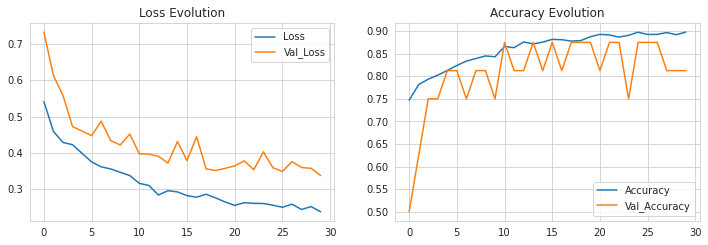

In [42]:
plt.figure(figsize=(12, 8))
plt.title('EVALUATION OF VGG19')

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [81]:
prediction1=model.predict(test)

In [90]:
prediction1[:10]

array([[0.13773471],
       [0.79220426],
       [0.79095334],
       [0.08949771],
       [0.5902913 ],
       [0.7954633 ],
       [0.7760658 ],
       [0.9392343 ],
       [0.9745138 ],
       [0.7619216 ]], dtype=float32)

# ResNet50V2

In [54]:
resnet_model = tf.keras.applications.ResNet50V2(
    weights='imagenet',
    include_top = False,
    input_shape = (224,224,3)
)

for layer in resnet_model.layers:
    layer.trainable=False
    
x = resnet_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model2 = tf.keras.Model(inputs=resnet_model.input, outputs=predictions)======

In [50]:
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

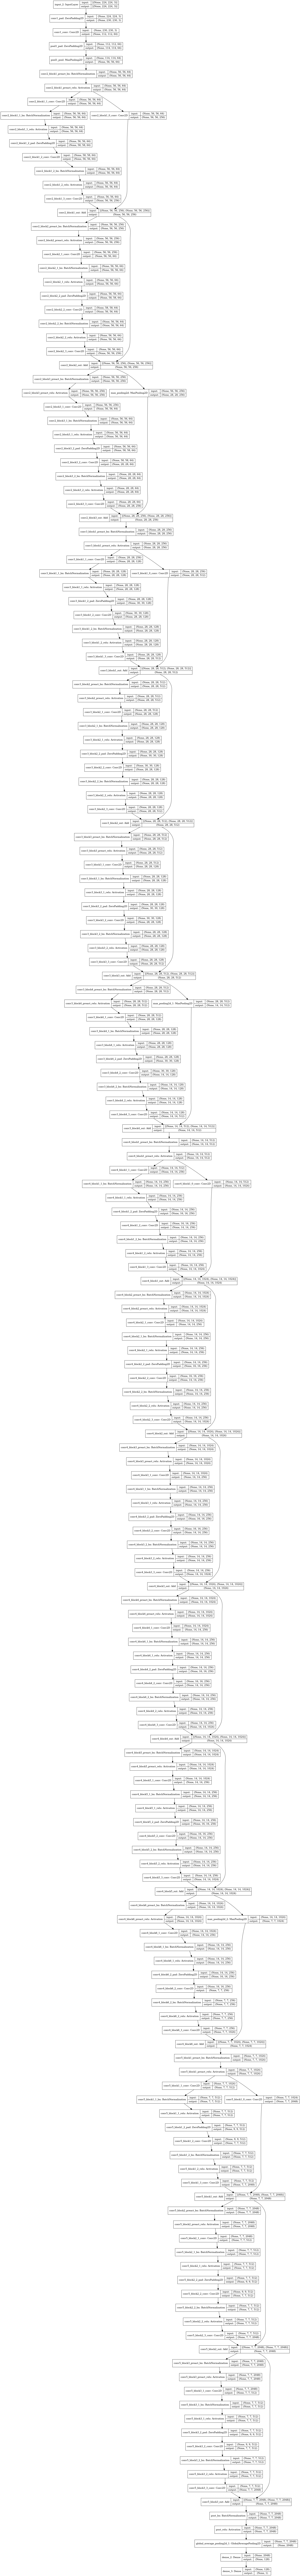

In [51]:
from tensorflow.keras.utils import to_categorical, plot_model
plot_model(model2, to_file='cnn-mnist.png', show_shapes=True)

In [55]:
# Compiling the model
model2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [56]:
history = model2.fit(train,epochs=50, 
                    validation_data=validation,
                     steps_per_epoch=50,
                    callbacks=[early_stopping,lr],
                    batch_size=32)

Epoch 1/50
50/50 [==============================] - 85s 2s/step - loss: 0.3044 - accuracy: 0.8649 - val_loss: 0.2021 - val_accuracy: 0.9375
Epoch 2/50
50/50 [==============================] - 83s 2s/step - loss: 0.2091 - accuracy: 0.9178 - val_loss: 0.1457 - val_accuracy: 0.9375
Epoch 3/50
50/50 [==============================] - 80s 2s/step - loss: 0.1900 - accuracy: 0.9287 - val_loss: 0.2679 - val_accuracy: 0.8750
Epoch 4/50
50/50 [==============================] - 80s 2s/step - loss: 0.1742 - accuracy: 0.9372 - val_loss: 0.1245 - val_accuracy: 0.9375
Epoch 5/50
50/50 [==============================] - 80s 2s/step - loss: 0.1764 - accuracy: 0.9283 - val_loss: 0.1443 - val_accuracy: 0.9375
Epoch 6/50
50/50 [==============================] - 80s 2s/step - loss: 0.1695 - accuracy: 0.9319 - val_loss: 0.1483 - val_accuracy: 0.9375
Epoch 7/50
50/50 [==============================] - 81s 2s/step - loss: 0.1797 - accuracy: 0.9300 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 8/50
50/50 [==

# Evaluating the model on train and test

In [57]:
# Evaluating the model on train 
score = model2.evaluate(train)

print("Train Loss: ", score[0])
print("Train Accuracy: ", score[1])

82/82 [==============================] - 131s 2s/step - loss: 0.1260 - accuracy: 0.9507
Train Loss:  0.1259610950946808
Train Accuracy:  0.9507285356521606


In [58]:
# Evaluating the model test
score = model2.evaluate(test)
print("\nTest loss: ", score[0])
print("Test Accuracy: ", score[1])

10/10 [==============================] - 8s 763ms/step - loss: 0.1987 - accuracy: 0.9231

Test loss:  0.19868189096450806
Test Accuracy:  0.9230769276618958


Text(0.5, 1.0, 'Accuracy Evolution')

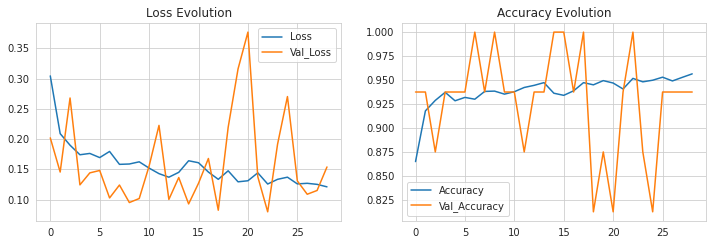

In [59]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.legend()
plt.title('Loss Evolution')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_Accuracy')
plt.legend()
plt.title('Accuracy Evolution')

In [88]:
prediction2=model2.predict(test)


In [89]:
prediction2[:10]

array([[0.9882138 ],
       [0.00182282],
       [0.05821382],
       [0.9998105 ],
       [0.91693765],
       [0.13727716],
       [0.3197112 ],
       [0.94393075],
       [0.9310717 ],
       [0.94519603]], dtype=float32)